# FTR

## Section 1

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import numpy as np
import scipy.stats as stats
import math

N = 1000
no_bins = 60

In [2]:
def probability_of_band(x_1,x_2):
    return stats.norm.cdf(x_2) - stats.norm.cdf(x_1)

In [3]:
def mean_of_band(x_1,x_2,n_j):
    return probability_of_band(x_1,x_2) * n_j

In [4]:
def std_of_band(x_1,x_2,n_j, no_bins=60):
    p_j = probability_of_band(x_1, x_2)
    variance = n_j * p_j * (1 - p_j)
    std = np.sqrt(variance)
    return std, variance

In [5]:
def ksdensity(data, width=0.3):
    """Returns kernel smoothing function from data points in data"""
    def ksd(x_axis):
        def n_pdf(x, mu=0., sigma=1.):  # normal pdf
            u = (x - mu) / abs(sigma)
            y = (1 / (np.sqrt(2 * np.pi) * abs(sigma)))
            y *= np.exp(-u * u / 2)
            return y
        prob = [n_pdf(x_i, data, width) for x_i in x_axis]
        pdf = [np.average(pr) for pr in prob]  # each row is one x value
        return np.array(pdf)
    return ksd

In [6]:
def plot_for_N(N):
    norm = np.random.randn(N)
    fig, ax = plt.subplots(1,figsize=(12, 6))

    # Gausian parameters
    mu = 0
    variance = 1
    sigma = math.sqrt(variance)
    x_norm = np.linspace(mu-5*sigma, mu+5*sigma, N)

    # scaled 
    no_bins = 60
    bin_width = (max(norm)-min(norm))/no_bins

    ax.hist(norm, bins=no_bins, label='Histogram') 


    # Plotting theoretical mean
    hist = np.histogram(norm,bins=no_bins)
    total_mean = 0
    total_variance = 0

    for i,x_1 in enumerate(hist[1][:-1]):
        x_2 = hist[1][i+1]
        n_j = hist[0][i] 
        total_mean += mean_of_band(x_1,x_2,n_j)

        # mean of bin
        bin_mean = probability_of_band(x_1,x_2)*N
        ax.plot(np.linspace(x_1,x_2,10), [bin_mean]*10, color='orange')

        # std of bin
        bin_std, bin_variance = std_of_band(x_1,x_2, N)
        ax.plot(np.linspace(x_1,x_2,10), [bin_mean+3*bin_std]*10, color='r')
        ax.plot(np.linspace(x_1,x_2,10), [bin_mean-3*bin_std]*10, color='r')
        total_variance += bin_variance/no_bins
        
    # legend 
    handles, labels = ax.get_legend_handles_labels()
    line1 = Line2D([], [], color='orange', label='Bin Theoretical Mean')
    line2 = Line2D([], [], color='r', label='Bin $\pm$ 3 stdv') 
    [handles.append(line) for line in [line1,line2]]
    ax.legend(handles=handles, loc='upper right')
    ax.set_title('Plot with {} random variables'.format(N))
    ax.set_xlabel('$x$')
    ax.set_ylabel('$p(x)$')
    
    plt.savefig('FTR_plots/plot_N_{}.png'.format(N))
    fig.show()

C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


[None, None, None]

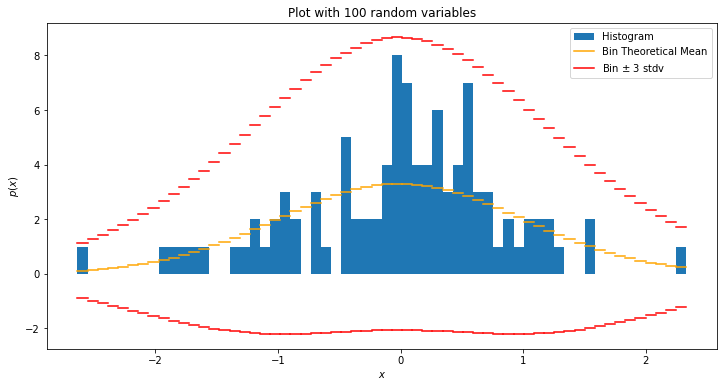

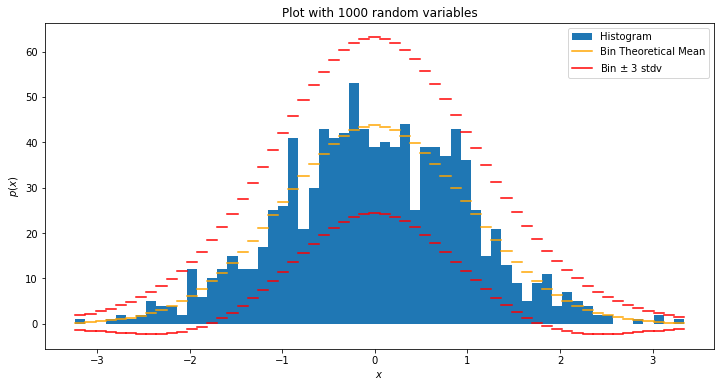

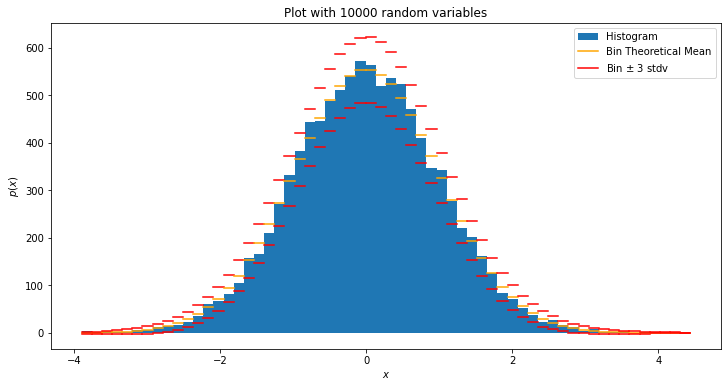

In [7]:
[plot_for_N(n) for n in [100,1000,10000]]

 We can see that for the larger values of $N$ that the bin standard deviation decreases as a proportion of the bin theoretical mean. 
 
 We can also see that the histogram variance from the histogram theoretical mean is largest around the mean value of $x$, and as $x$ tends to $\pm \infty$. These values correspond to when $p_j$ are nearest to 1, and 0.
 
 We can see that at the intermediate values of $x$, near to $\pm \sigma$ (the stdv of the Gaussian distributed x values), the variance from the theoretical mean of the histogram is at its minimum.  
 

## Section 2

In [8]:
x = np.random.rand(N)*2*math.pi

In [9]:
def f(x):
    return np.sin(x)

In [10]:
def p_x(x):
    if x < 2*math.pi and x > 0:
        return 1/(2*math.pi)
    else:
        return 0

In [11]:
def p_y(y):
    frac1 = p_x(np.arcsin(y))/abs(np.cos(np.arcsin(y)))
    frac2 = p_x(math.pi - np.arcsin(y))/abs(np.cos(math.pi - np.arcsin(y)))
    frac3 = p_x(2*math.pi + np.arcsin(y))/abs(np.cos(2*math.pi + np.arcsin(y)))
    return frac1+frac2+frac3

In [12]:
x_ = np.linspace(-0.99999,0.99999,500000)
y_ = []
for x in x_:
    y_.append(p_y(x))
    
y_ = np.array(y_)

integral = np.sum(y_*((max(x_)-min(x_))/x_.size))
print('''If this p(y) is correct, it must first integrate to 1.\n
        Integral p(y) dy = {}'''.format(integral))

If this p(y) is correct, it must first integrate to 1.

        Integral p(y) dy = 0.997445056137818


Text(0, 0.5, '$p(y)$')

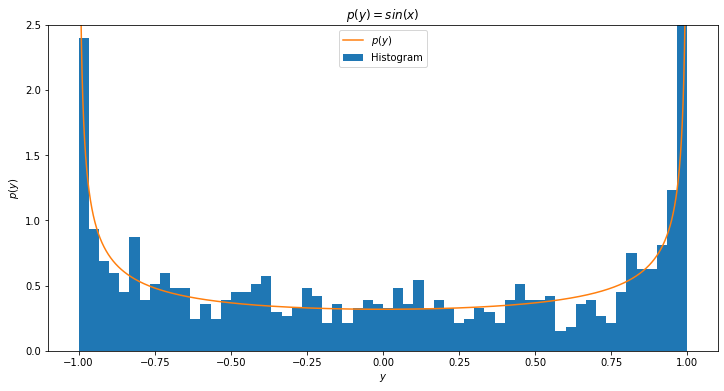

In [13]:
x = np.random.rand(N)*2*math.pi
y = f(x)

fig, ax = plt.subplots(1,figsize=(12, 6))
ax.hist(y,bins=no_bins,label='Histogram', density=True)

ax.plot(x_,y_, label='$p(y)$')
ax.set_ylim(0,2.5)
ax.legend()
ax.set_title('$p(y) = sin(x)$')
ax.set_xlabel('$y$')
ax.set_ylabel('$p(y)$')
# fig.savefig('FTR_plots/f_x_sin_x.png')

In [14]:
def f(x):
    return np.minimum(np.sin(x), 0.7)

In [15]:
x_ = np.linspace(-0.99999,0.99999,500)

def p_y(y):
    
    if y < 0.7:
        frac1 = p_x(np.arcsin(y))/abs(np.cos(np.arcsin(y)))
        frac2 = p_x(math.pi - np.arcsin(y))/abs(np.cos(math.pi - np.arcsin(y)))
        frac3 = p_x(2*math.pi + np.arcsin(y))/abs(np.cos(2*math.pi + np.arcsin(y)))
        return frac1+frac2+frac3
    else:
        return 10000000000000000000000000 #arbitary large number

In [16]:
y_ = []
for x in x_:
    y_.append(p_y(x))
    
y_ = np.array(y_)

left_index = np.argmax(y_)
print(left_index)
integral = np.sum(y_[:left_index]*((max(x_)-min(x_))/x_.size))
print('''If this p(y) is correct, it must first integrate to 1.\n
        Integral p(y) dy = {}'''.format(integral))

425
If this p(y) is correct, it must first integrate to 1.

        Integral p(y) dy = 1.0098301141986208


Text(0.5, 1.0, '$p(y) = min(sin(x),0.7)$')

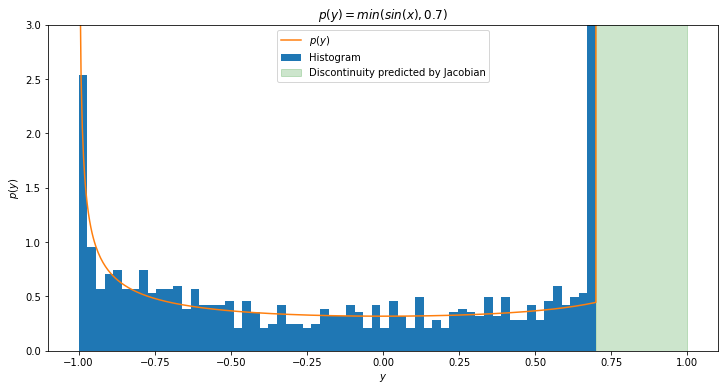

In [17]:
x = np.random.rand(N)*2*math.pi
y = f(x)

fig, ax = plt.subplots(1,figsize=(12, 6))

ax.fill_between(np.linspace(0.7, 1,100), 0, [30]*100, color='g', alpha=0.2, label='Discontinuity predicted by Jacobian')
ax.hist(y,bins=no_bins, label='Histogram', density=True)
ax.plot(x_,y_, label='$p(y)$')
ax.legend()
ax.set_ylim(0,3)
ax.set_xlabel('$y$')
ax.set_ylabel('$p(y)$')
ax.set_title('$p(y) = min(sin(x),0.7)$')
# fig.savefig('FTR_plots/f_x_min_sin_x_0_7.png')

## Section 3

In [18]:
def inverse_F(x):
    return np.log(1/(1-x))

In [19]:
def p(y):
    return stats.expon.pdf(y)

Text(0.5, 1.0, 'Samples from the exponential distribution')

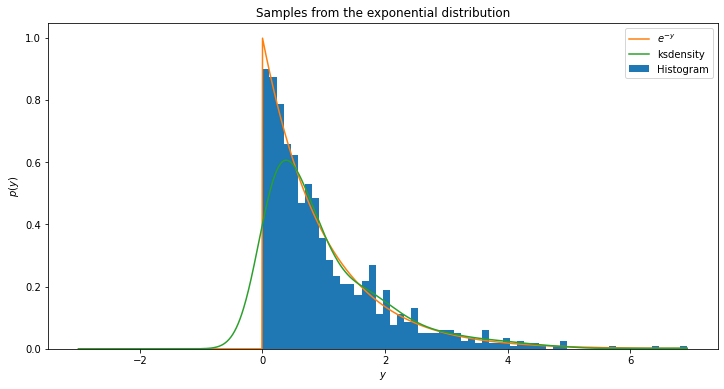

In [20]:
x = np.random.rand(N)
y = inverse_F(x)
fig, ax = plt.subplots(1,figsize=(12, 6))

# Histogram
ax.hist(y,bins=no_bins,label='Histogram', density=True)

# P(y)
rescale_factor = (max(y)-min(y))/no_bins
x_ax = np.linspace(-3,max(y),N)
ax.plot(x_ax,p(x_ax),label='$e^{-y}$')

# ksdensity
ks_density = ksdensity(y)
ax.plot(x_ax,ks_density(x_ax),label='ksdensity')

# visualisation
ax.set_xlabel('$y$')
ax.set_ylabel('$p(y)$')
ax.legend()
ax.set_title('Samples from the exponential distribution')
# fig.savefig('FTR_plots/inverse_CFD_method.png')

In [21]:
print('''The theoretical mean and theoretical variance of an exponential function, and recorded 
mean and variance of the sample, are: 
\n \t \t mean \t | \t variance \n Theoretical  \t 1 \t | \t 1 \n Recorded  \t {} \t | \t {} '''.format(round(np.mean(y),3),round(np.var(y),3)))


The theoretical mean and theoretical variance of an exponential function, and recorded 
mean and variance of the sample, are: 

 	 	 mean 	 | 	 variance 
 Theoretical  	 1 	 | 	 1 
 Recorded  	 1.002 	 | 	 0.978 


### Plot Squared Error of Monte Carlo method

[10, 100, 1000, 10000, 100000, 1000000]


Text(0.5, 1.0, 'Squared Error')

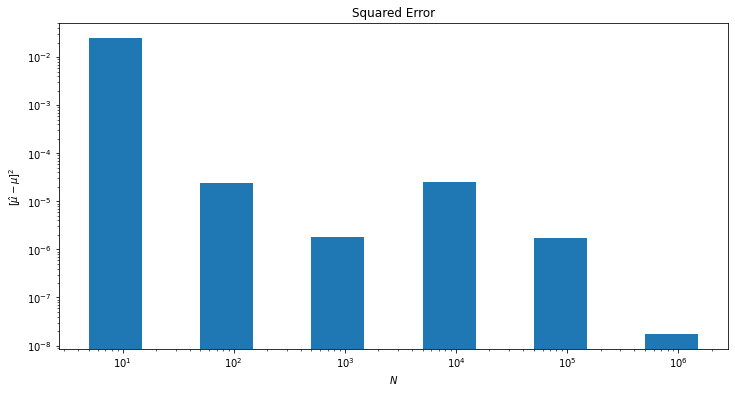

In [22]:
fig, ax = plt.subplots(1,figsize=(12, 6))
squ_err_n = {}
list_n = [10**i for i in range(1,7)]
print(list_n)
for N in list_n:
    x = np.random.rand(N)
    mean = np.mean(x)
    squ_err = (mean - 0.5)**2
    squ_err_n[N] = squ_err

ax.bar(list(squ_err_n.keys()), list(squ_err_n.values()), width=list_n, log=True)


ax.set_xscale('log')
ax.set_xlabel('$N$')
ax.set_ylabel('$[\mu\u0302 - \mu]^2$')
ax.set_title('Squared Error')
# fig.savefig('FTR_plots/squared_error.png')

## Section 4

In [23]:
N = 20000
thetas = [1, 2, 5, 10, 100]

In [24]:
def samples(theta, N):
    gammas = np.random.gamma(theta, 1/theta, N)
    stds = np.sqrt(1 / gammas)
    normal_samples = np.random.randn(N)

    return np.multiply(normal_samples, stds)

In [25]:
def p(theta, x):
    return theta ** theta / np.sqrt(2 * np.pi) * math.gamma(theta + 1/2) / math.gamma(theta) * (2 / (x**2 + 2*theta)) ** (theta + 1/2)

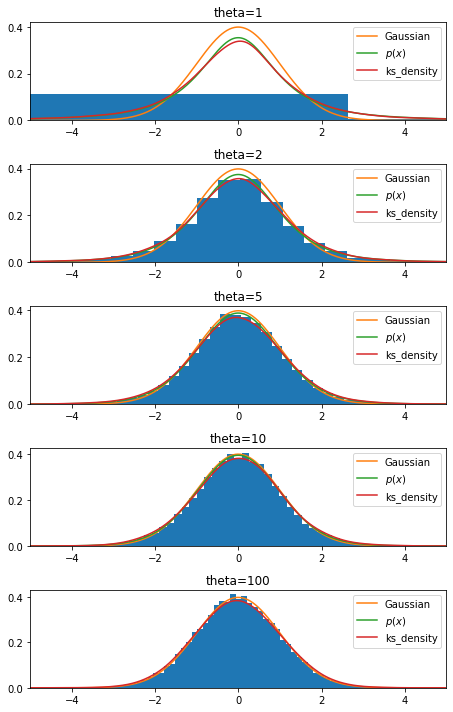

In [26]:
fig, ax = plt.subplots(len(thetas))
fig.set_size_inches(6.4, 10)
x_ax = np.linspace(-5, 5, 500)

for i,theta in enumerate(thetas):
    y = samples(theta, N)
    ax[i].hist(y, bins=no_bins, density=True)

    # Plot normal distribution
    ax[i].plot(x_ax, stats.norm.pdf(x_ax), label='Gaussian')
    ax[i].plot(x_ax, p(theta, x_ax), label='$p(x)$')

    # Plot kernel density
    ks_density = ksdensity(y)
    ax[i].plot(x_ax, ks_density(x_ax), label='ks_density')

    ax[i].set_title('theta={}'.format(theta))
    ax[i].legend()
    ax[i].set_xlim([-5, 5])

fig.tight_layout()
# fig.savefig('FTR_plots/mixed-gamma-distribution')

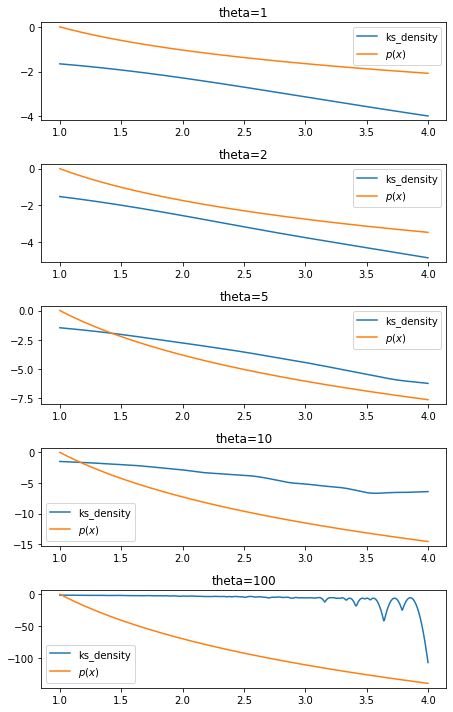

In [27]:
fig, ax = plt.subplots(len(thetas))
fig.set_size_inches(6.4, 10)

x_axis = np.linspace(1, 4, 500)

for i,theta in enumerate(thetas):
    theta = thetas[i]

    y = samples(theta, N)

    # Plot kernel density
    ks_density = ksdensity(y, width=1/theta)
    ax[i].plot(x_axis, np.log(ks_density(x_axis)), label='ks_density')
    ax[i].plot(x_axis, -(theta + 1/2) * np.log(x_axis), label='$p(x)$')

    ax[i].set_title('theta=' + str(theta))
    ax[i].legend()

fig.tight_layout()
# fig.savefig('FTR_plots/mixed-gamma-distribution-log')